# Latent space models on networks

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))


from LSMN_P import *

## Network

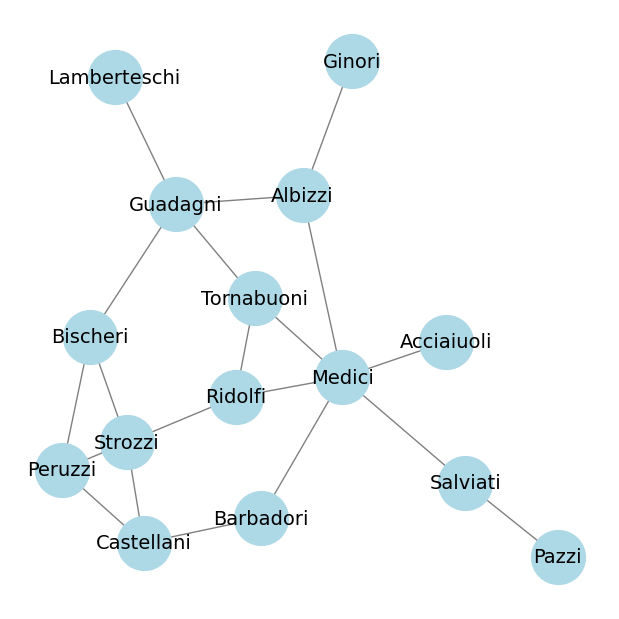

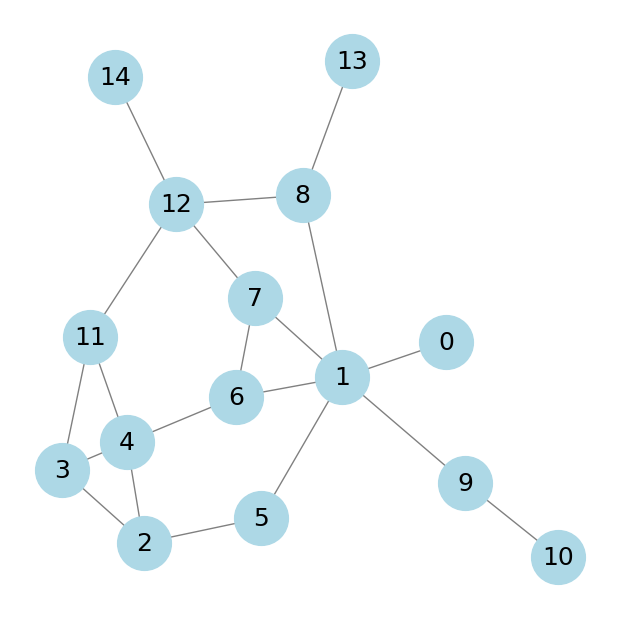

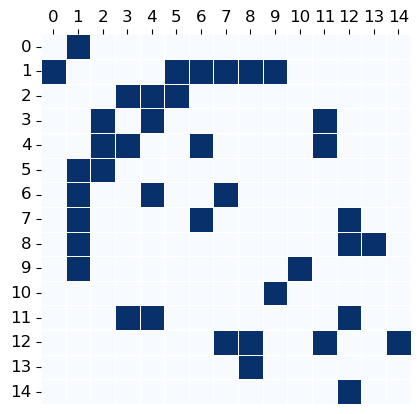

In [2]:
G = nx.florentine_families_graph()
pos = nx.spring_layout(G, seed=80)
plt.figure(figsize=(6,6))
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=14)
#plt.title("Florentine Families network")
plt.show()

G = nx.florentine_families_graph()
node_mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, node_mapping)
n = len(G.nodes)
plt.figure(figsize=(6,6))
pos_relabel = {node_mapping[k]: v for k, v in pos.items()}
nx.draw(G,  pos=pos_relabel, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=18)
#plt.title("Florentine Families network with relabeled nodes")
plt.show()
#print("Map from original nodes to new nodes:")
#print(node_mapping)

Y = nx.to_numpy_array(G, dtype=float)

sns.heatmap(Y, annot=False, cmap="Blues", cbar=False, square=True, linewidths=0.5, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_top() 
plt.gca().tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=12)
#plt.title("Sociomatrix for Florentine families")
plt.show() 

# Model $\mathbb{R}^1$

In [ ]:
# Configuration
Theta_R1 = {
    'Z0': np.random.normal(0, 1, size=(n, 1)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 50000,       
    'thin': 50,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}

# Estimation
resultsR1 = Estimation_LSMN(Y, Theta_R1, Model="Euclidean")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsR1)

#Visualizing latent space
plot_latent_space(resultsR1)

# Posterior predictive checking
posterior_predictive_check(resultsR1)

# Prior predictive checking
prior_predictive_check(resultsR1)

# Prediction evaluation
metricsR1 = prediction_evaluation(resultsR1)

# Save results
handle_results(resultsR1, filepath='resultsR1.pkl', mode='save')

# Model $\mathbb{R}^2$

In [ ]:
# Configuration
Theta_R2 = {
    'Z0': np.random.normal(0, 1, size=(n, 2)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 50000,       
    'thin': 50,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}

# Estimation
resultsR2 = Estimation_LSMN(Y, Theta_R2, Model="Euclidean")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsR2)

#Visualizing latent space
plot_latent_space(resultsR2)

# Posterior predictive checking
posterior_predictive_check(resultsR2)

# Prior predictive checking
prior_predictive_check(resultsR2)

# Prediction evaluation
metricsR2 = prediction_evaluation(resultsR2)

# Save results
handle_results(resultsR2, filepath='resultsR2.pkl', mode='save')

# Model $\mathbb{R}^3$

In [ ]:
# Configuration
Theta_R3 = {
    'Z0': np.random.normal(0, 1, size=(n, 3)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 50000,       
    'thin': 50,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}

# Estimation
resultsR3 = Estimation_LSMN(Y, Theta_R3, Model="Euclidean")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsR3)

#Visualizing latent space
plot_latent_space(resultsR3)

# Posterior predictive checking
posterior_predictive_check(resultsR3)

# Prior predictive checking
prior_predictive_check(resultsR3)

# Prediction evaluation
metricsR3 = prediction_evaluation(resultsR3)

# Save results
handle_results(resultsR3, filepath='resultsR3.pkl', mode='save')

# Model $\mathbb{S}^0$

In [5]:
random_VMF(np.array([[1]]), 0.9, size=n)

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.]])

Metropolis-Hastings for Spherical latent space models on networks
Number of chains: 2
MH samples of size 5000 with burn-in 5000 and thinning 5
Number of draws per chain: 30000
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 0.5000
Initial sigma_q_beta: 0.5000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -49.4473
------------------------------------------------------------
Log-prior:
sigma_prior_alpha:  1.0
sigma_prior_beta:  1.0
********************************
Chain 0
********************************


Sampling progress:  17%|█▋        | 5029/30000 [00:49<03:36, 115.40 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7602
Final sigma_q_beta: 0.7299


Sampling progress: 100%|██████████| 30000/30000 [04:33<00:00, 109.51 draws/s]


********************************
Chain 1
********************************


Sampling progress:  17%|█▋        | 5008/30000 [00:46<03:39, 114.10 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.8698
Final sigma_q_beta: 0.6914


Sampling progress: 100%|██████████| 30000/30000 [04:35<00:00, 109.05 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9999
Maximum R-hat: 1.0017
Minimum ESS/n: 0.2211
Maximum ESS/n: 0.5706
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -285.7051         -28.7579        -314.4630
ML                 -49.4473         -83.6050        -133.0523
CM                 -53.7177         -68.5765        -122.2942
MAP                -50.3674         -68.3022        -118.6695
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 289.9906
DIC: 222.0626
BIC: 264.5440

Final acceptance rate Z: 0.5858
Final acceptance rate alpha: 0.3364
Final acceptance rate beta: 0.3995

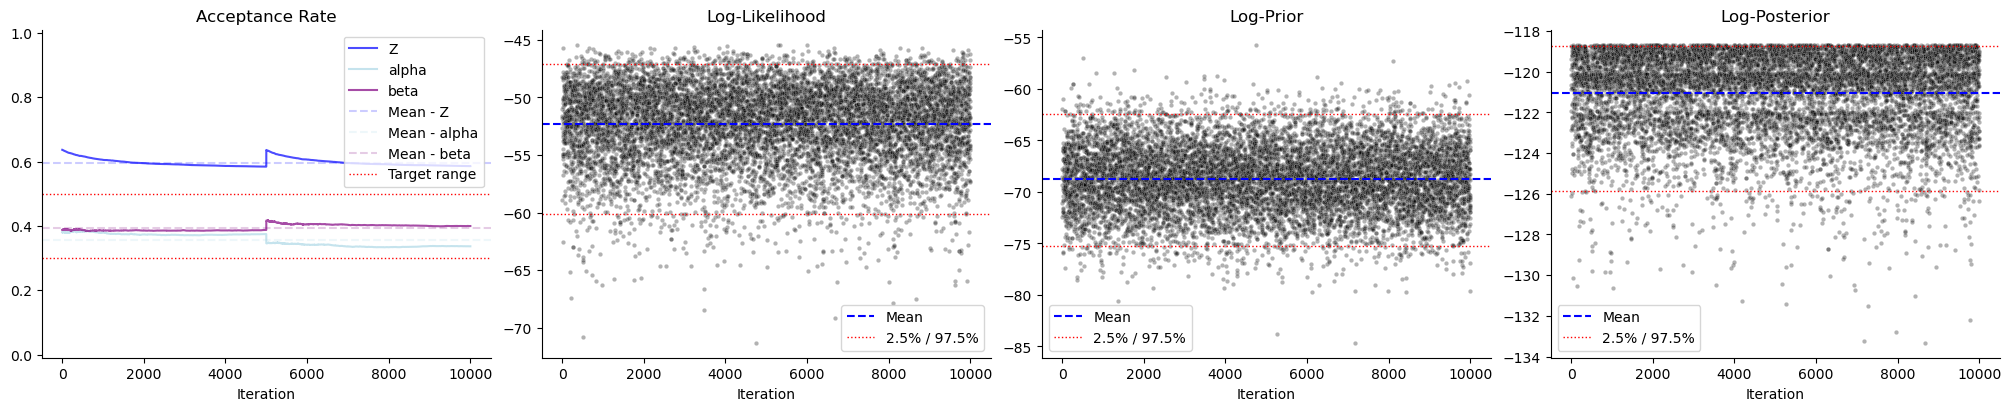

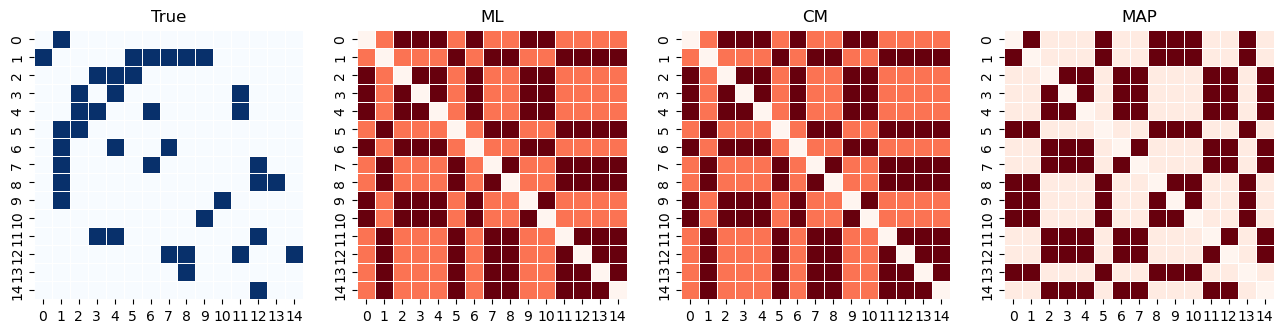

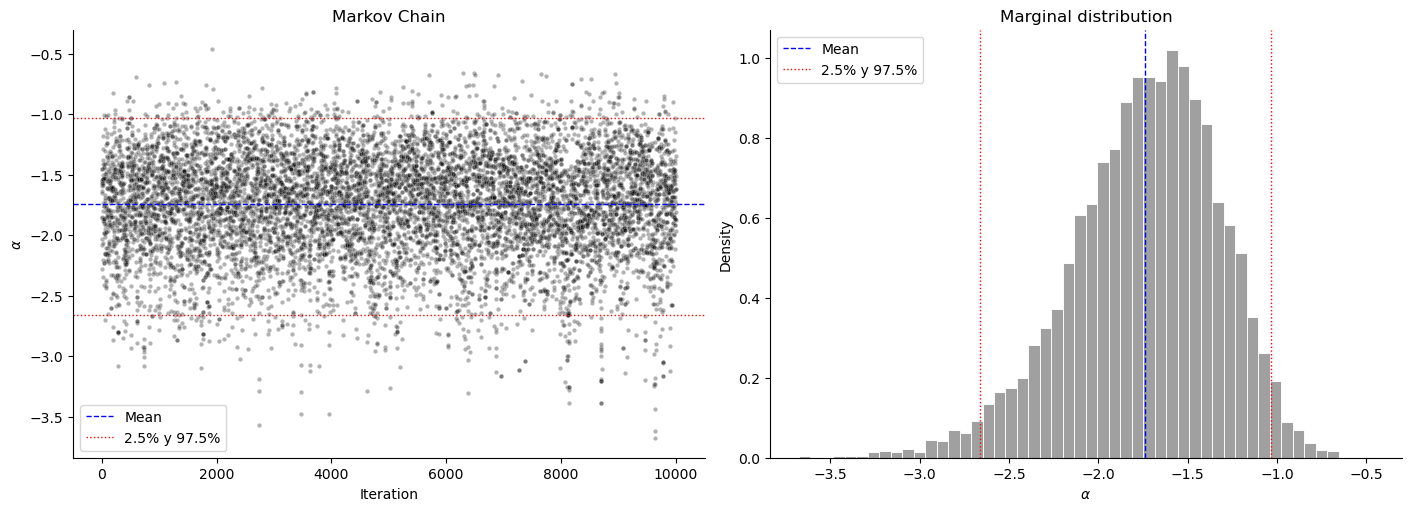

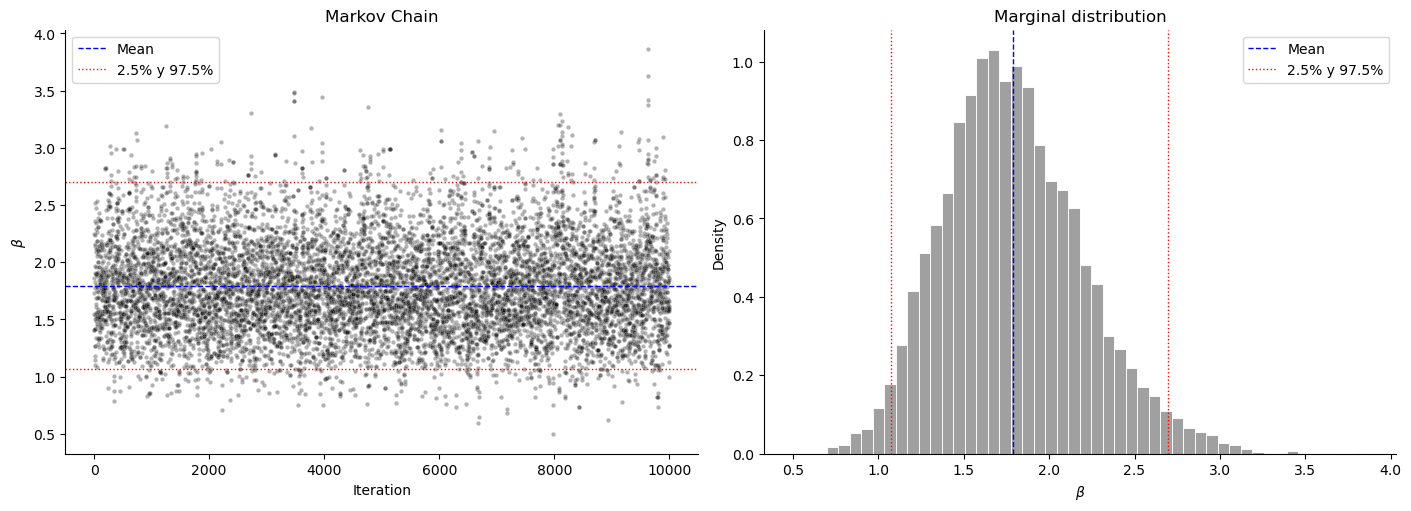

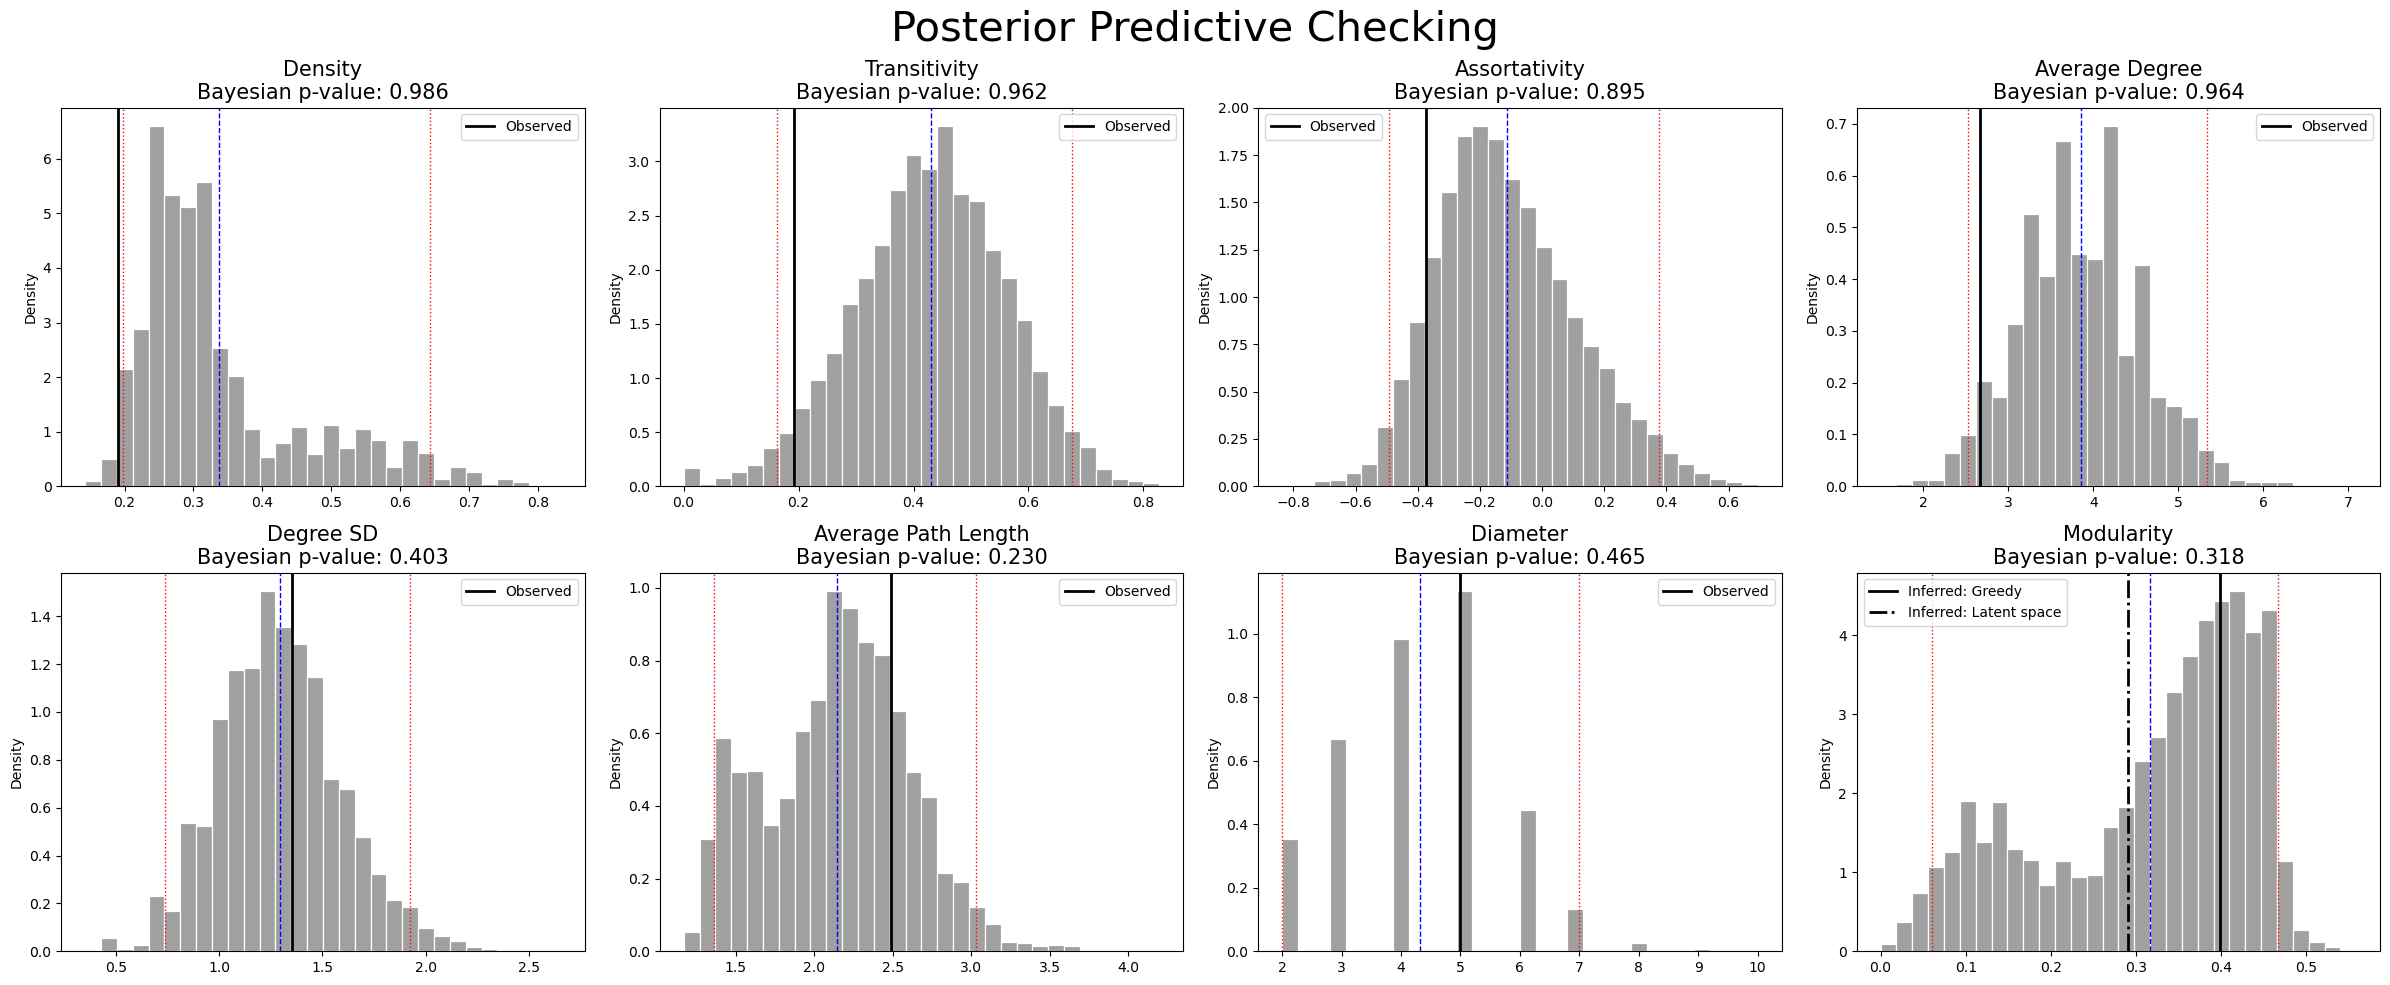

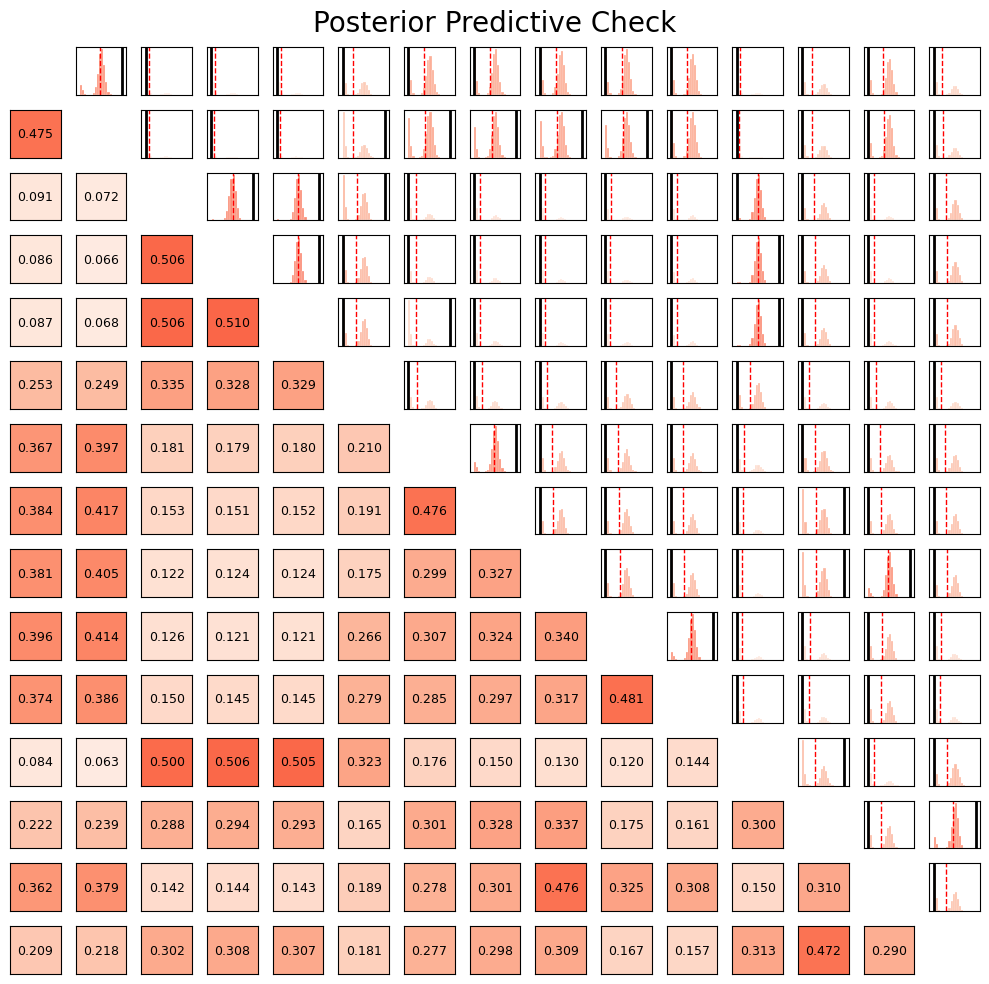

TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
# Configuration
Theta_S0 = {
    'Z0': random_VMF(np.array([[1]]), 0.0, size=n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 5000,       
    'thin': 5,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

# Estimation
resultsS0 = Estimation_LSMN(Y, Theta_S0, Model="Spherical")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsS0)

#Visualizing latent space
#plot_latent_space(resultsS0)

# Posterior predictive checking
posterior_predictive_check(resultsS0)

# Prior predictive checking
#prior_predictive_check(resultsS0)

# Prediction evaluation
metricsS0 = prediction_evaluation(resultsS0)

# Save results
handle_results(resultsS0, filepath='resultsS0.pkl', mode='save')

In [25]:
for l in range(n):
    print(f'Node {l}', np.sum(resultsS0['samples']['Z'][:,l,:]==1)/10000)

Node 0 0.4398
Node 1 0.3784
Node 2 0.6666
Node 3 0.6549
Node 4 0.6569
Node 5 0.558
Node 6 0.5363
Node 7 0.4597
Node 8 0.1674
Node 9 0.5217
Node 10 0.5707
Node 11 0.6412
Node 12 0.2042
Node 13 0.221
Node 14 0.2601


# Model $\mathbb{S}^1$

In [ ]:
# Configuration
Theta_S1 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 50000,       
    'thin': 75,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

# Estimation
resultsS1 = Estimation_LSMN(Y, Theta_S1, Model="Spherical")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsS1)

#Visualizing latent space
plot_latent_space(resultsS1)

# Posterior predictive checking
posterior_predictive_check(resultsS1)

# Prior predictive checking
prior_predictive_check(resultsS1)

# Prediction evaluation
metricsS1 = prediction_evaluation(resultsS1)

# Save results
handle_results(resultsS1, filepath='resultsS1.pkl', mode='save')

# Model $\mathbb{S}^2$

In [ ]:
# Configuration
Theta_S2 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, size=n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 5000,      
    'burn_in': 50000,       
    'thin': 75,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5    
}


# Estimation
resultsS2 = Estimation_LSMN(Y, Theta_S2, Model="Spherical")

# Diagnostic analysis: Acceptance rate, Log probabilities traces, Adjacency matrices of point estimations, Traces of fixed parameters
plot_mcmc_diagnostics_panel(resultsS2)

#Visualizing latent space
plot_latent_space(resultsS2)

# Posterior predictive checking
posterior_predictive_check(resultsS2)

# Prior predictive checking
prior_predictive_check(resultsS2)

# Prediction evaluation
metricsS2 = prediction_evaluation(resultsS2)

# Save results
handle_results(resultsS2, filepath='resultsS2.pkl', mode='save')

# Model comparison

In [ ]:
resultsR1 = handle_results(filepath='resultsR1.pkl', mode='load')
resultsR2 = handle_results(filepath='resultsR2.pkl', mode='load')
resultsR3 = handle_results(filepath='resultsR3.pkl', mode='load')
resultsS1 = handle_results(filepath='resultsS1.pkl', mode='load')
resultsS2 = handle_results(filepath='resultsS2.pkl', mode='load')

results_dict = {
    'R1': resultsR1,
    'R2': resultsR2,
    'R3': resultsR3,
    'S1': resultsS1,
    'S2': resultsS2
}

In [ ]:
df_comparison = model_comparison(results_dict)
df_comparison

In [ ]:
df_comparison[['Model','WAIC', 'mean_log_likelihood', 'ml_log_likelihood', 'cm_log_likelihood', 'map_log_likelihood']]

In [ ]:
plot_loglikelihood_comparison(results_dict)

In [ ]:
compare_posterior_predictive_checks(results_dict)

In [ ]:
pairwise_sociomatrix_plot_all_models(results_dict)

In [ ]:
df_metrics = compare_prediction_evaluation(results_dict)
df_metrics

In [ ]:
latent_variance(results_dict).mean()

In [ ]:
centrality_analysis(results_dict)['correlation']

In [ ]:
latent_clustering(results_dict,range(3,4))
